In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
sns.color_palette(cccpalette)

In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 6.00e-01, 5.18e+04
gamma^D_h  = 6.00e-01, 5.18e+04
R_p  = 7.00e+00, 6.05e+05
R_h  = 4.50e+00, 3.89e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 1.16e-06, 1.00e-01
E^I_h  = 0.00e+00, 0.00e+00
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 1.43e-01, 1.23e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 2.50e-01, 2.16e+04
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 1.16e-07, 1.00e-02
Vmax^IN_p  = 1.16e-05, 1.00e+00
Vmax^OC_p  = 4.54e+02, 3.92e+07
Vmax^IC_p  = 4.54e+04, 3.92e+09
Vmax^ON_h  = 5.79e-05, 5.00e+00
Vmax^IN_h  = 5.79e-05, 5.00e+00
Vmax^OC_h  = 2.60e-04, 2.25e+01
Vmax^IC_h  = 1.82e-01, 1.58e+04
O_p  = 6.00e-01, 5.18e+04
O_h  = 6.00e-01, 5.18e+04
E^T_p  = 6.48e-07, 5.60e-02
E^T_h  = 4.05e-07, 3.50e-02
VTmax  = 7.70e-06, 6.65e-01
KT_h  = 2.50e-01, 2.16e+04
omega_p  = 1.00e-02, 8.64e+02
omega_h  = 1.00e-05, 8.64e-01
ROS_decay

In [8]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [9]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data()

In [10]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 1.27e-05, init Bp = 1.79e+00, newval = 1.79e+00
dDON/dt = 3.10e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 8.27e-07, init RDON = 0.00e+00, newval = 8.27e-07
dDIN/dt = -1.67e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 4.85e+04, init DOC = 1.32e+02, newval = 4.86e+04
dRDOC/dt = 5.79e-06, init RDOC = 0.00e+00, newval = 5.79e-06
dDIC/dt = -4.85e+04, init DIC = 3.00e+03, newval = -4.55e+04
dROS/dt = -2.00e-03, init ROS = 2.00e-01, newval = 1.98e-01
dSp/dt = 1.16e-16, init Sp = 0.00e+00, newval = 1.16e-16
dSh/dt = 0.00e+00, init Sh = 0.00e+00, newval = 0.00e+00


In [11]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
limINp = 9.99e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
gross_uptakeINp = 2.06e-05
gross_uptakeONp = 2.05e-07
gross_uptakeICp = 8.09e+04
gross_uptakeOCp = 8.08e+02
actual_uptakeNp = 2.08e-05
overflowNp = 0.00e+00
overflowCp = 8.17e+04
deathp = 2.07e-06
exudationOp = 2.07e-06
exudationIp = 0.00e+00
Treleasep = 1.16e-06
respirationp = 3.93e-06
dic_uptake = -1.04e-16


In [12]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


dBp/dt  + dDON/dt + dRDON/dt + dDIN/dt = -1.1578601575787384e-16


In [13]:
init_vars

In [14]:
#sol = run_solver(calc_dydt, init_vars)
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 39.59375


In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,Sp,Sh,...,overflowCp,deathp,exudationOp,exudationIp,Treleasep,respirationp,dic_uptake,Bp[C],Sp[C],Sh[C]
0,1.785714,20.000000,0.000000,100.000000,132.500000,0.000000,3.000000e+03,0.200000,0.000000e+00,0.0,...,81660.492249,0.000002,0.000002,0.0,0.000001,0.000004,-1.040834e-16,12.500000,0.000000e+00,0.0
1,1.979582,20.047047,0.012540,99.746546,3959.053372,0.087779,1.523985e-07,0.000128,1.282144e-14,0.0,...,898.205660,0.000002,0.000002,0.0,0.000001,0.000004,5.750000e-02,13.857071,8.975011e-14,0.0
2,2.194500,20.099201,0.026441,99.465572,4785.451635,0.185088,1.374812e-07,0.000142,1.421344e-14,0.0,...,995.717282,0.000003,0.000003,0.0,0.000001,0.000005,5.750000e-02,15.361499,9.949406e-14,0.0
3,2.432750,20.157018,0.041852,99.154095,5611.676013,0.292962,1.240250e-07,0.000158,1.575654e-14,0.0,...,1103.813348,0.000003,0.000003,0.0,0.000002,0.000005,5.750000e-02,17.029247,1.102958e-13,0.0
4,2.696863,20.221111,0.058935,98.808805,6437.707633,0.412547,1.118867e-07,0.000175,1.746717e-14,0.0,...,1223.643211,0.000003,0.000003,0.0,0.000002,0.000006,5.750000e-02,18.878042,1.222702e-13,0.0


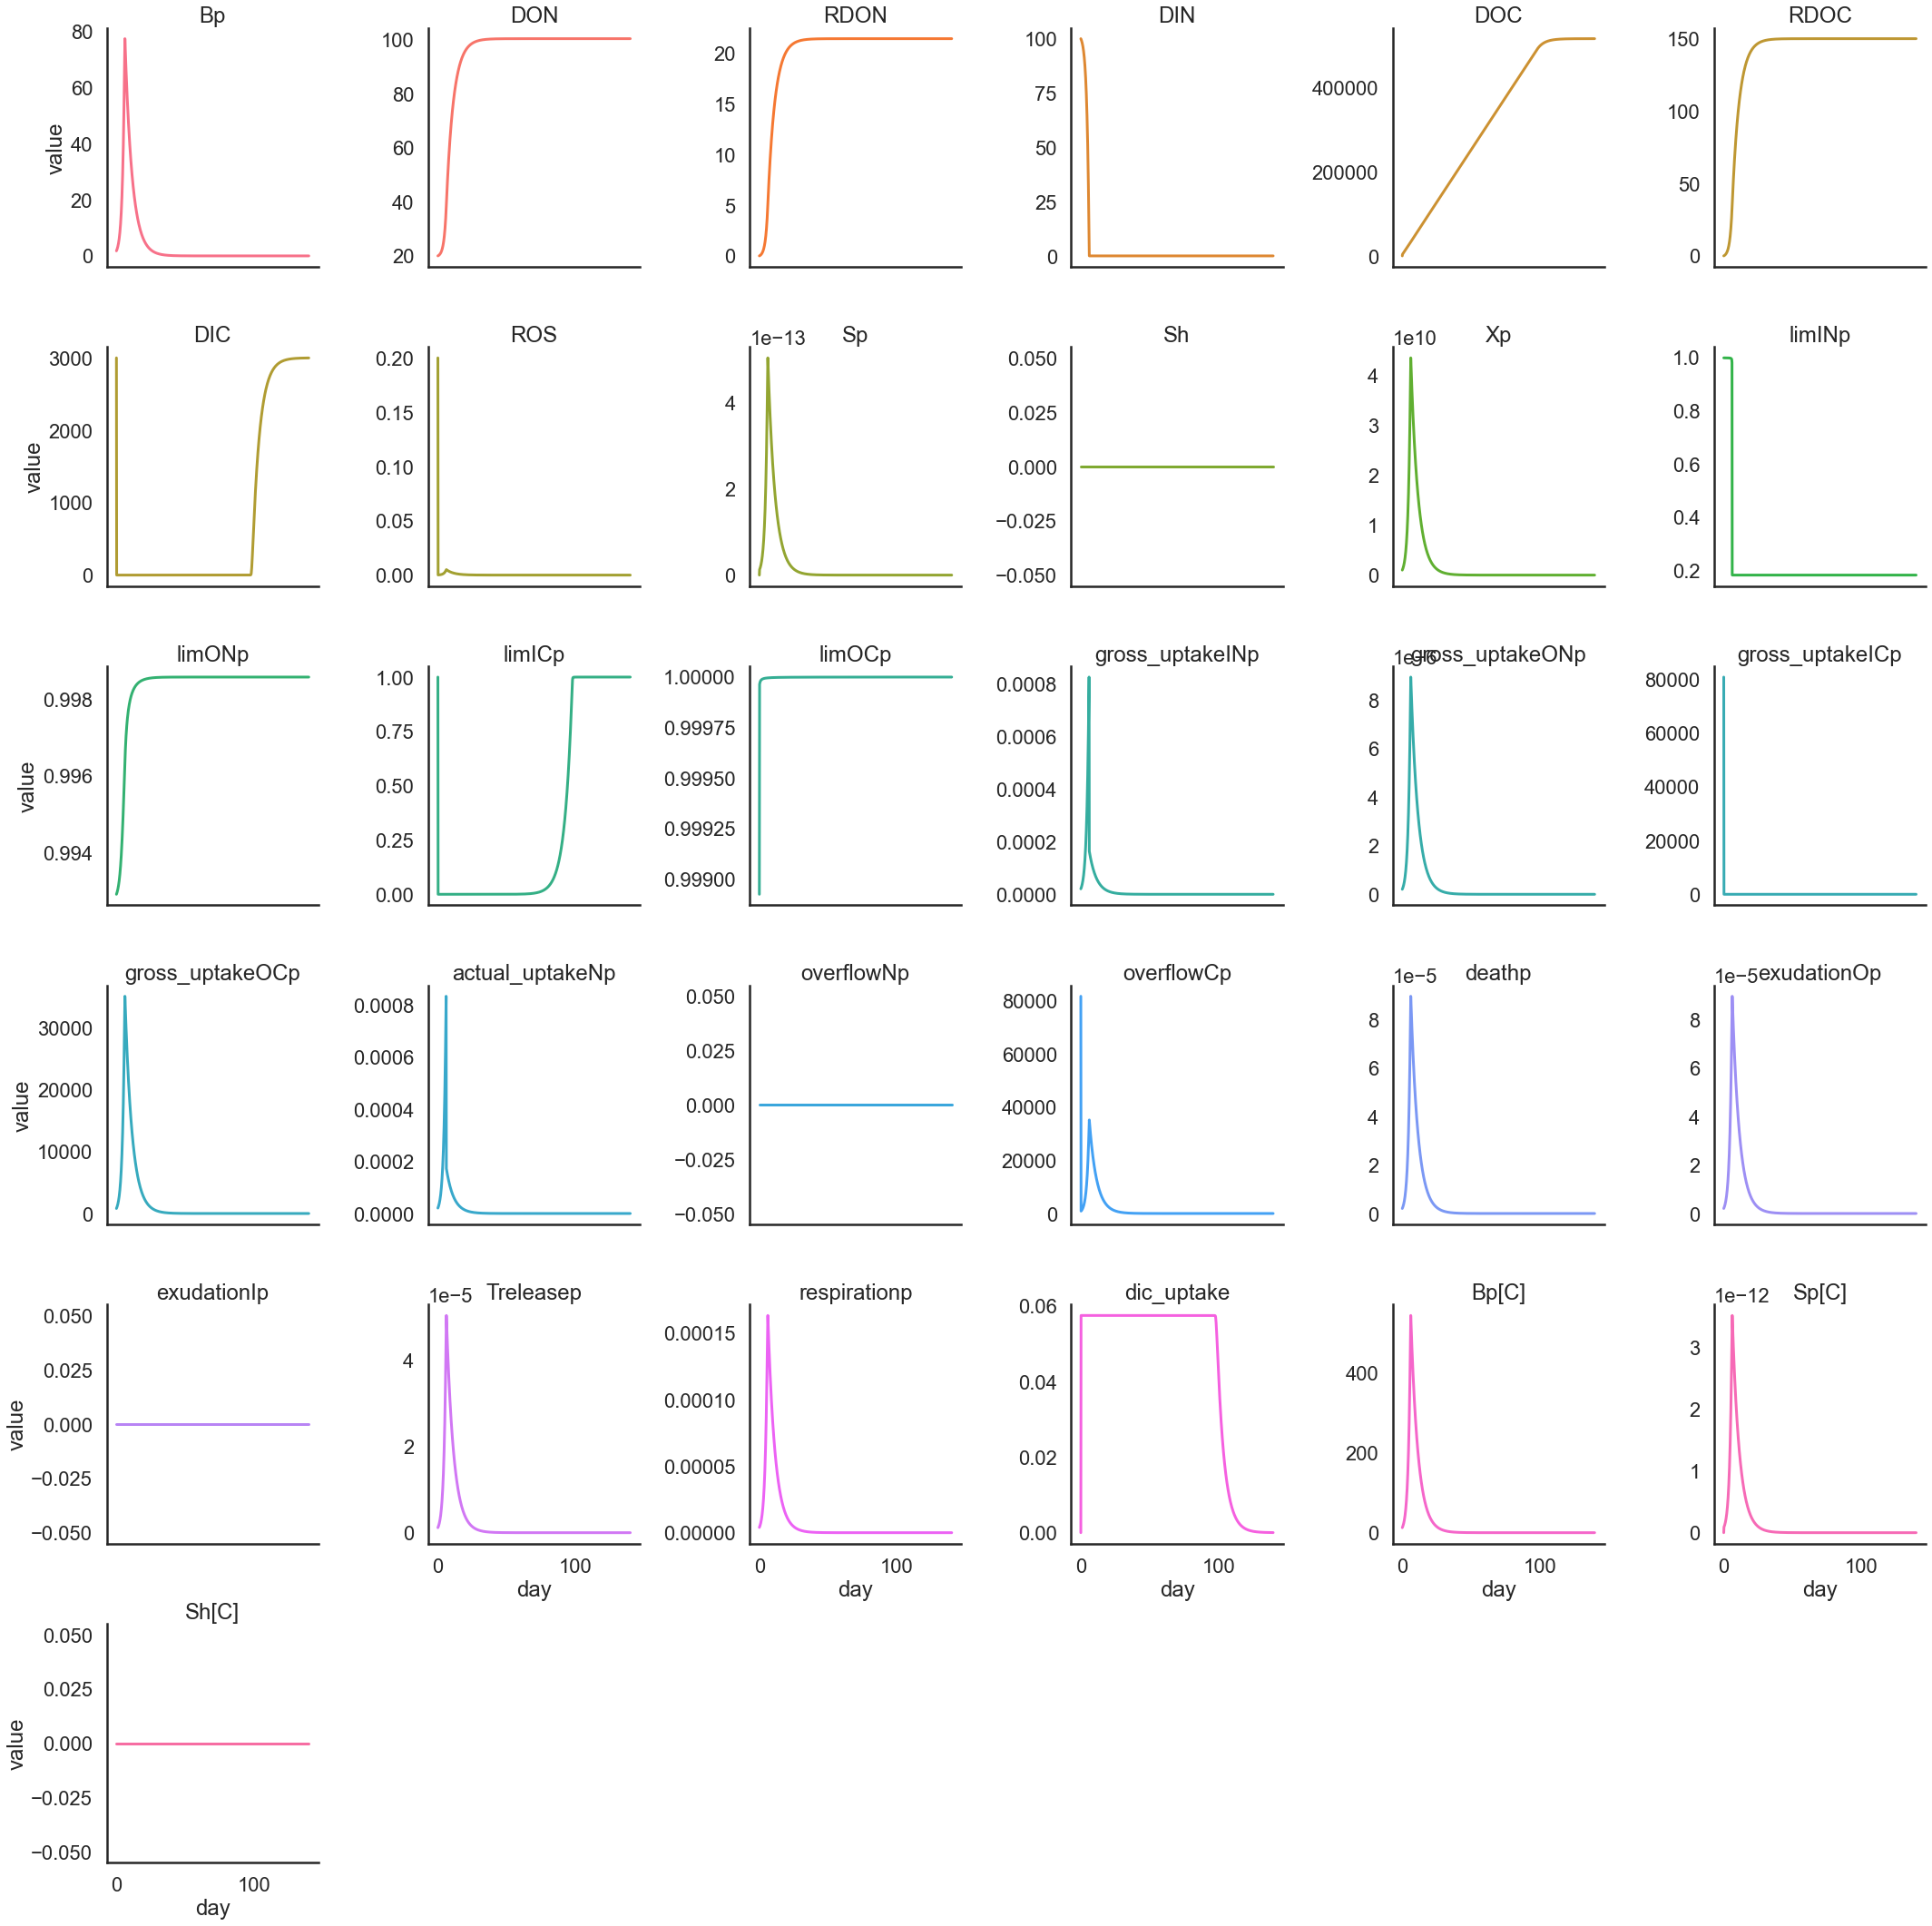

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

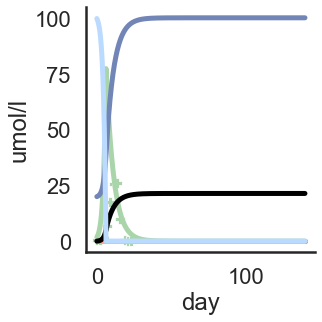

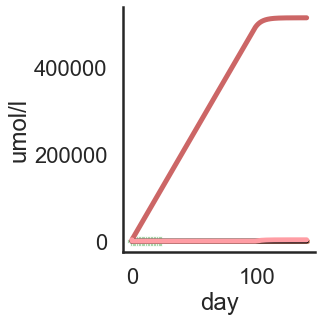

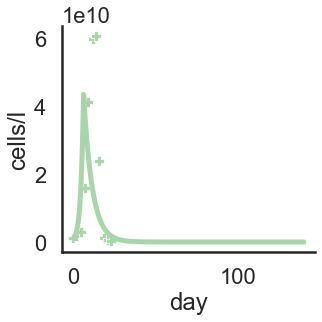

In [19]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')


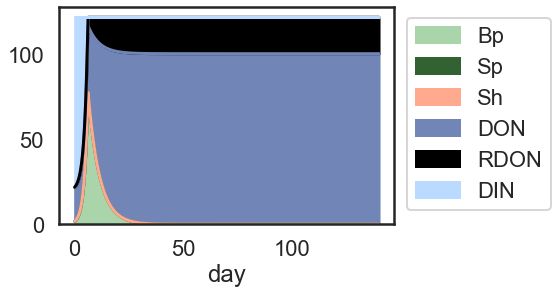

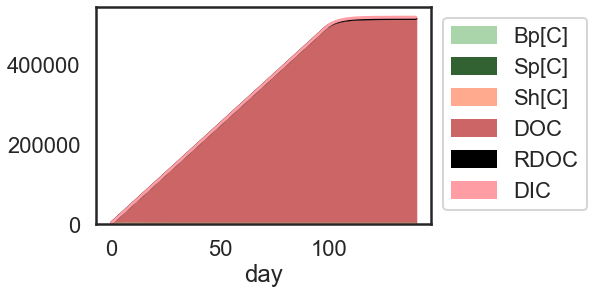

In [20]:
from matplotlib.colors import LinearSegmentedColormap
df[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


<AxesSubplot:xlabel='day', ylabel='cells/l'>

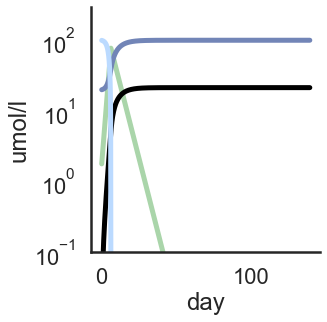

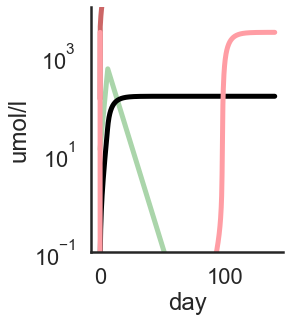

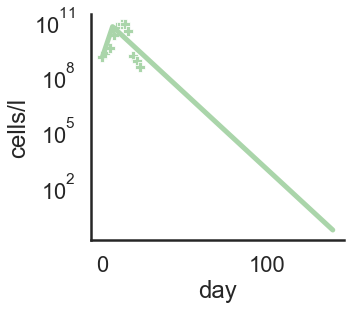

In [21]:
sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False,color=PCOLOR_light, marker='P')


In [22]:
len(param_vals)

In [23]:
df.min()

Bp                 7.224824e-10
DON                2.000000e+01
RDON               0.000000e+00
DIN                3.174391e-02
DOC                1.325000e+02
RDOC               0.000000e+00
DIC                3.968004e-09
ROS                4.683787e-14
Sp                 0.000000e+00
Sh                 0.000000e+00
t                  0.000000e+00
day                0.000000e+00
Xp                 4.045902e-01
limINp             1.819191e-01
limONp             9.929130e-01
limICp             2.779672e-08
limOCp             9.989238e-01
gross_uptakeINp    1.521219e-15
gross_uptakeONp    8.350185e-17
gross_uptakeICp    3.277774e-05
gross_uptakeOCp    3.277929e-07
actual_uptakeNp    1.604721e-15
overflowNp         0.000000e+00
overflowCp         3.310553e-05
deathp             8.362065e-16
exudationOp        8.362065e-16
exudationIp        0.000000e+00
Treleasep          4.682757e-16
respirationp       1.521219e-15
dic_uptake        -1.040834e-16
Bp[C]              5.057377e-09
Sp[C]   